# Default on Credit Card Prediction

This problem was discovered on the Interet and the dataset is available in the datasets folder on my page. In the problem, we are to predict whether individuals will default on loans based on various features. The prediction versus actual will be the final line in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.​

In [4]:
dataset=r'C:\Users\claudius.ibine\Desktop\credit-card.csv'
dataset=pd.read_csv(dataset,index_col="ID")
dataset=dataset[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4','default.payment.next.month']]

dataset=dataset.rename(columns={'default.payment.next.month':'Default'})
dataset=dataset.rename(columns={'LIMIT_BAL':'Balance'})
dataset=dataset.rename(columns={'SEX':'Gender'})
dataset=dataset.rename(columns={'EDUCATION':'Education'})
dataset=dataset.rename(columns={'AGE':'Age'})
dataset=dataset.rename(columns={'MARRIAGE':'Marriage'})
dataset=dataset.rename(columns={'PAY_0':'Pay-1'})
dataset=dataset.rename(columns={'PAY_2':'Pay-2'})
dataset=dataset.rename(columns={'PAY_3':'Pay-3'})
dataset=dataset.rename(columns={'PAY_4':'Pay-4'})

Here is where I summarized the dataset.

In [7]:
def aggregate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(10))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [8]:
aggregate()

The number of rows by columns:  (30000, 10)

The first 10 records are:
     Balance  Gender  Education  Marriage  Age  Pay-1  Pay-2  Pay-3  Pay-4  \
ID                                                                           
1    20000.0       2          2         1   24      2      2     -1     -1   
2   120000.0       2          2         2   26     -1      2      0      0   
3    90000.0       2          2         2   34      0      0      0      0   
4    50000.0       2          2         1   37      0      0      0      0   
5    50000.0       1          2         1   57     -1      0     -1      0   
6    50000.0       1          1         2   37      0      0      0      0   
7   500000.0       1          1         2   29      0      0      0      0   
8   100000.0       2          2         2   23      0     -1     -1      0   
9   140000.0       2          3         1   28      0      0      2      0   
10   20000.0       1          3         2   35     -2     -2     -2    

Here is where I cleaned the dataset.

In [9]:
def clean():
    print(dataset.isnull().sum()) #check nulll values
    print(dataset.describe()) #check for low values in min

dataset=dataset[['Balance','Gender','Education','Marriage','Age','Default']]
dataset['Age']=pd.cut(dataset['Age'],[0, 30,50,150], labels=['0-30', '30-50', '50-100'])
dataset['Balance']=pd.cut(dataset['Balance'],[0, 30000, 60000,100000,1000000000], labels=['0-30000', '30000-60000', '60000-100000','100000-1000000000'])

In [10]:
print(dataset.head(11))

              Balance  Gender  Education  Marriage     Age  Default
ID                                                                 
1             0-30000       2          2         1    0-30        1
2   100000-1000000000       2          2         2    0-30        1
3        60000-100000       2          2         2   30-50        0
4         30000-60000       2          2         1   30-50        0
5         30000-60000       1          2         1  50-100        0
6         30000-60000       1          1         2   30-50        0
7   100000-1000000000       1          1         2    0-30        0
8        60000-100000       2          2         2    0-30        0
9   100000-1000000000       2          3         1    0-30        0
10            0-30000       1          3         2   30-50        0
11  100000-1000000000       2          3         2   30-50        0


Here I will convert the string values to numericals for the machine learning model.

In [11]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.Age=le.fit_transform(processed_df.Age)
    processed_df.Balance = le.fit_transform(processed_df.Balance)
    return processed_df
dataset=preprocess_dataset(dataset)

In [12]:
print(dataset.head(11))

    Balance  Gender  Education  Marriage  Age  Default
ID                                                    
1         0       2          2         1    0        1
2         1       2          2         2    0        1
3         3       2          2         2    1        0
4         2       2          2         1    1        0
5         2       1          2         1    2        0
6         2       1          1         2    1        0
7         1       1          1         2    0        0
8         3       2          2         2    0        0
9         1       2          3         1    0        0
10        0       1          3         2    1        0
11        1       2          3         2    1        0


Here I will identify the feature and target column and split the dataset into training and testing.

In [13]:
feature=['Balance','Gender','Education','Marriage','Age']
target='Default'
x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best model for this problem using the below function.

In [14]:
def algorithms():
    models=[]
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    results=[]
    names=[]
    scoring='accuracy'
    for name, model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seed)
        cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
        print(msg)

    fig=plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return

LR: 0.778800 (0.017234)
LDA: 0.778800 (0.017234)
KNN: 0.741333 (0.030392)
CART: 0.776467 (0.017323)
NB: 0.778800 (0.017234)
SVM: 0.778800 (0.017234)


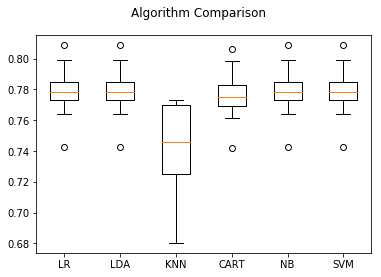

In [15]:
algorithms()

Here I will fit the machine learning model.

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction=lr.predict(x_test)

In [18]:
features=x_test.reset_index()
features=features[['Balance','Gender','Education','Marriage','Age']]
actual=(list(y_test))
prediction=(list(lr_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)
output=features

In [19]:
print(actual)

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

In [20]:
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
final=features[['actual','prediction']]

In [22]:
print(final)

       actual  prediction
0           0           0
1           0           0
2           0           0
3           0           0
4           0           0
5           1           0
6           1           0
7           0           0
8           0           0
9           0           0
10          0           0
11          0           0
12          1           0
13          0           0
14          0           0
15          1           0
16          0           0
17          0           0
18          0           0
19          0           0
20          0           0
21          0           0
22          0           0
23          0           0
24          0           0
25          0           0
26          1           0
27          0           0
28          0           0
29          0           0
...       ...         ...
11970       1           0
11971       0           0
11972       1           0
11973       0           0
11974       1           0
11975       1           0
11976       

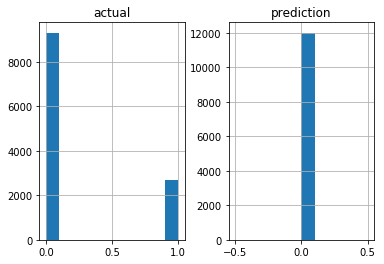

In [23]:
final.hist()
plt.show()